In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\owner\Downloads\MathsnStats_shoe_sale_analysis_resources\MathsnStats_shoe_sale_analysis_resources\shoe_sales.csv")
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [5]:
df.shape

(60, 3)

In [6]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [7]:
df[df.sold_qty<16].shape #data in 50 percentile

(27, 3)

### (1) Nike Analysis

In [9]:
df_nike=df[df["brand"]=="Nike"]
df_nike.shape

(30, 3)

In [10]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [12]:
round(df_nike.sold_qty.median())

20

In [14]:
df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [15]:
val=round(df_nike.sold_qty.median())
val

20

In [16]:
df_nike.sold_qty.fillna(val,inplace=True)

C:\Users\owner\AppData\Local\Temp\ipykernel_21864\496827104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nike.sold_qty.fillna(val,inplace=True)
C:\Users\owner\AppData\Local\Temp\ipykernel_21864\496827104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.sold_qty.fillna(val,inplace=True)


In [17]:
df_nike.loc[[32,48]]

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


In [20]:
df_nike.sold_qty.sum()

590.0

### (2) Analysis Adidas

In [18]:
df_adidas=df[df.brand=="Adidas"]
df_adidas.shape

(30, 3)

In [19]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [21]:
df_adidas.sold_qty.median()

12.5

In [24]:
df_adidas.sold_qty.quantile([0.95])
#This means that 95% of the sold_qty values are less than or equal to   18.55, and 5% are greater.

0.95    18.55
Name: sold_qty, dtype: float64

In [26]:
df_adidas[df_adidas.sold_qty>18.55]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


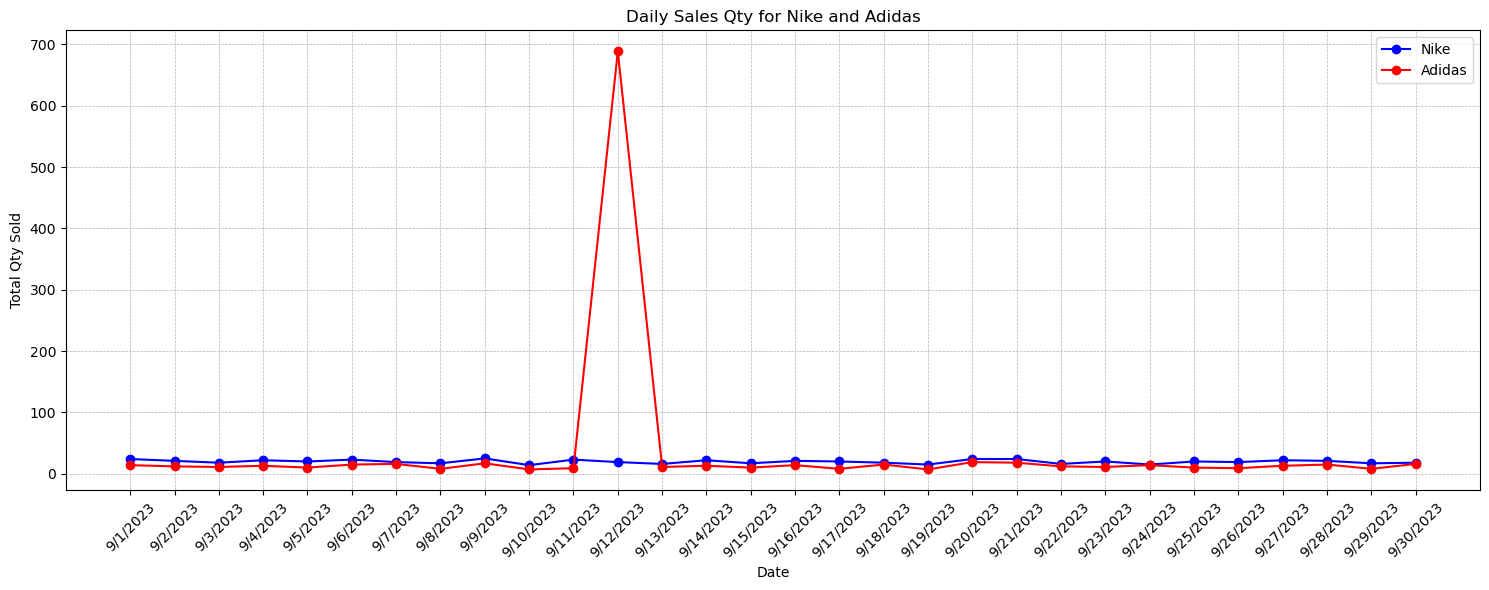

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_qty():
    plt.figure(figsize=(15, 6))
    
    # Extract dates for Nike
    dates = df_nike['date']

    # Plot Nike data
    plt.plot(dates, df_nike['sold_qty'], marker='o', label='Nike', color='blue')
    plt.plot(dates, df_adidas['sold_qty'], marker='o', label='Adidas', color='red')
    
    plt.xlabel('Date')
    plt.ylabel('Total Qty Sold')
    plt.title('Daily Sales Qty for Nike and Adidas')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

plot_qty()


In [32]:
val=round(df_adidas.sold_qty.median())
val

12

In [33]:
df_adidas.sold_qty.replace(689,val,inplace=True)

C:\Users\owner\AppData\Local\Temp\ipykernel_21864\3944355392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas.sold_qty.replace(689,val,inplace=True)


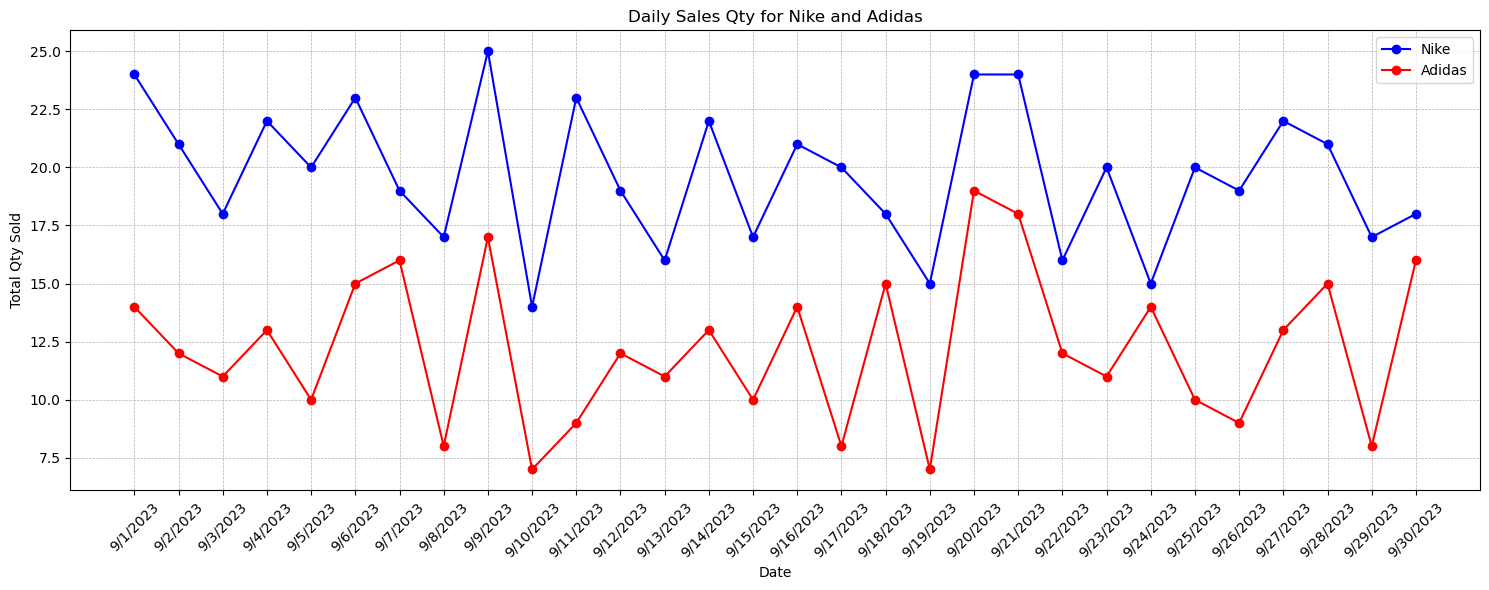

In [34]:
plot_qty()